# Imports 

In [86]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd 


# Setup 
Declaring digits into a usable datatype

In [87]:
digits = load_digits()
type(digits)

sklearn.utils._bunch.Bunch

In [88]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

# Digits 
Working with the digits dataset from sklearn 

In [89]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [90]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

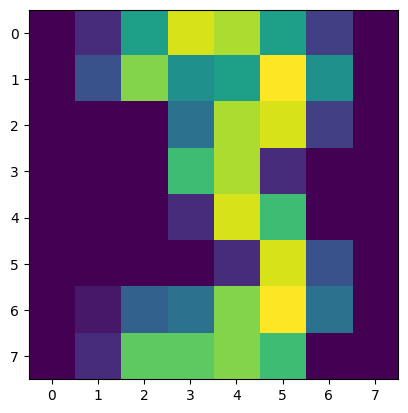

In [91]:
plt.imshow(digits.images[13])

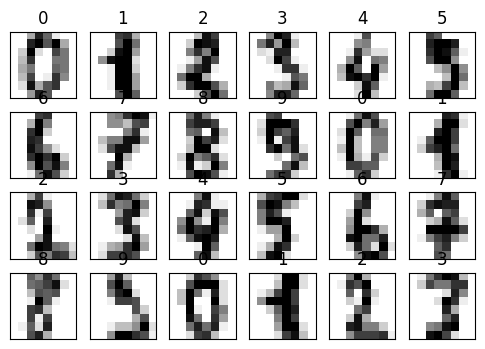

In [92]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([]) 
    axes.set_title(target)

# Training 
We do a simple training of our model, with a train set and a test set.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.8)

## KNN 
K nearest neighbor is our classifier of choice for this project. Grouping things based on radial proximity. 

In [116]:
KNeighborsClassifier(n_neighbors=5, weights='uniform')

KNeighborsClassifier()

In [117]:
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [118]:
predicted = knn.predict(X=X_test)
expected = y_test
print(predicted[:20])
print(expected[:20])

[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
[0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]


In [119]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
print("Model accuracy:%.2f%%" %(knn.score(X_test,y_test)*100))

Model accuracy:94.92%


In [120]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[138,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 142,   0,   0,   0,   0,   0,   0,   2,   2],
       [  1,   2, 140,   1,   0,   0,   0,   1,   4,   0],
       [  1,   0,   0, 140,   0,   2,   0,   1,   0,   2],
       [  1,   1,   0,   0, 145,   0,   0,   3,   0,   0],
       [  2,   0,   0,   0,   1, 147,   0,   0,   0,   6],
       [  0,   2,   0,   0,   0,   0, 142,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 142,   0,   0],
       [  0,   6,   2,   3,   0,   0,   2,   1, 116,   1],
       [  0,   4,   0,   2,   4,   3,   0,   8,   1, 113]])

# Visualization 
This section we visualize our data results, and see that the worst performing digit is 9. 

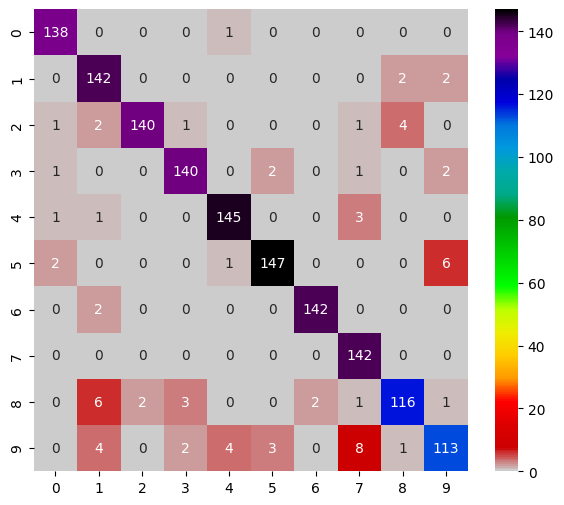

In [121]:
confusion_df = pd.DataFrame(confusion,
index=range(10), columns=range(10))
import seaborn as sns
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True,
cmap=plt.cm.nipy_spectral_r, fmt="d")

In [100]:
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       139
           1       0.90      0.97      0.94       146
           2       0.99      0.94      0.96       149
           3       0.96      0.96      0.96       146
           4       0.96      0.97      0.96       150
           5       0.97      0.94      0.95       156
           6       0.99      0.99      0.99       144
           7       0.91      1.00      0.95       142
           8       0.94      0.89      0.91       131
           9       0.91      0.84      0.87       135

    accuracy                           0.95      1438
   macro avg       0.95      0.95      0.95      1438
weighted avg       0.95      0.95      0.95      1438



# Dataset splitting 
using KFold we split the dataset multiple times and retest our AI to see how well it performs on these splits. We create 10 splits. 

In [104]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target,
cv=kfold)
scores

array([0.97222222, 0.98333333, 0.96666667, 0.97222222, 0.98333333,
       0.96666667, 0.97222222, 0.98882682, 0.99441341, 0.96648045])

## Visualizing individual K splits 
we see that, as more splits occur, the less accurate our predictor becomes. 

In [113]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.72%; standard deviation=0.75%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.39%; standard deviation=0.80%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.55%; standard deviation=1.06%
k=19; mean accuracy=97.66%; standard deviation=0.96%


# Different classifiers 
This short snippet simply compares training our data with different classifiers outside of KNN. 

In [123]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
    f'mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%
